In [0]:

#import package

from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder

In [58]:
#Open file
data = pd.read_csv('Static Dataset Transaction - Burger Star (Outlet A) .csv')
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


# **Data Preparation**

In [59]:
#Data Dimension
data.shape

(312, 9)

In [63]:
data.info

<bound method DataFrame.info of     Timestamp           Type Burger  ...  Gender   Payment
0       10:01           Beef burger  ...       1      DANA
1       10:04         Cheese burger  ...       0      DANA
2       10:05  Double cheese burger  ...       0  LINK AJA
3       10:06        Chicken burger  ...       0      DANA
4       10:07         Cheese burger  ...       1      DANA
5       10:08  Double cheese burger  ...       1      DANA
6       10:09           Beef burger  ...       1     GOPAY
7       10:11           Beef burger  ...       1     TUNAI
8       10:12  Double cheese burger  ...       0     TUNAI
9       10:16        Chicken burger  ...       0     TUNAI
10      10:17         Cheese burger  ...       1      DANA
11      10:19           Beef burger  ...       1       OVO
12      10:20        Chicken burger  ...       0  LINK AJA
13      10:24           Beef burger  ...       0     GOPAY
14      10:25           Beef burger  ...       1       OVO
15      10:26           

In [65]:
#data.describe()

,Code Burger,Amount Burger,Code Drink,Amount Drink,Gender
count,312.000000,312.00000,312.000000,312.000000,312.000000
mean,2.250000,6.25000,1.637821,3.913462,0.451923
std,1.173803,3.45969,1.045698,2.960981,0.498483
min,1.000000,1.00000,0.000000,0.000000,0.000000
25%,1.000000,3.00000,1.000000,2.000000,0.000000
50%,2.000000,6.00000,2.000000,3.000000,0.000000
75%,3.000000,9.00000,3.000000,5.000000,1.000000
max,4.000000,12.00000,3.000000,10.000000,1.000000


In [67]:
# Check Missing Values

sum_null = data.isnull().sum()
sum_null = pd.DataFrame(sum_null,columns=['null'])
j=1
sum_tot = len(data)
sum_null['percent']=sum_null['null']/sum_tot
round(sum_null,3).sort_values('percent', ascending=False)

,null,percent
Timestamp,0,0.0
Type Burger,0,0.0
Code Burger,0,0.0
Amount Burger,0,0.0
Type Drink,0,0.0
Code Drink,0,0.0
Amount Drink,0,0.0
Gender,0,0.0
Payment,0,0.0


# **Data Visualization**

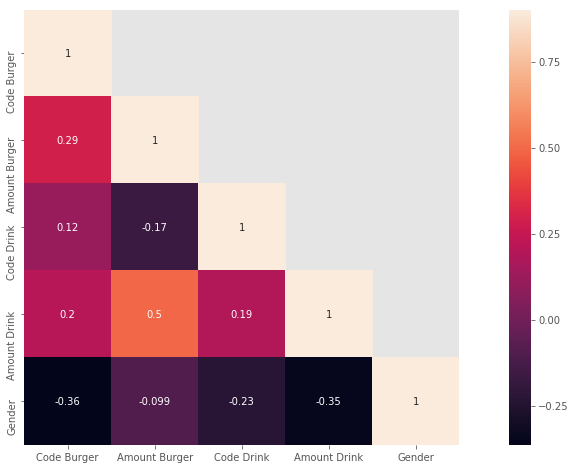

In [66]:
#create correlation with hitmap

#from this correlation, we know the value percentages of the correlation(1 or -1). The bigger value, so the correlation has big value too.
#weather has big correlation with the lattitude (-0,78). 

#create correlation
corr = data.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (10,12))
fig.set_size_inches(18,8)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Text(0.5, 0, 'Type of Burger')

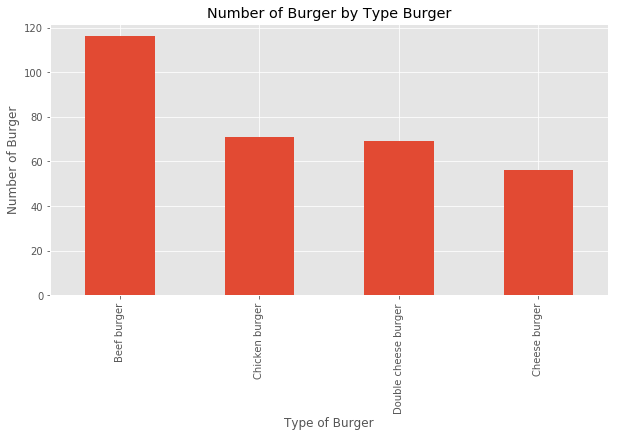

In [16]:
data['Type Burger'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title('Number of Burger by Type Burger')
plt.ylabel('Number of Burger')
plt.xlabel('Type of Burger')

Text(0.5, 0, 'Type of Drink')

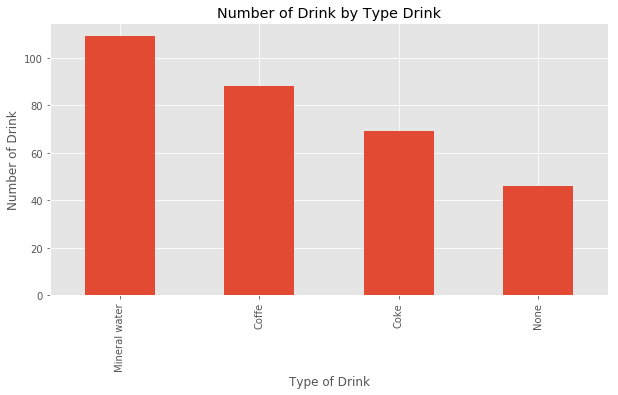

In [17]:
data['Type Drink'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title('Number of Drink by Type Drink')
plt.ylabel('Number of Drink')
plt.xlabel('Type of Drink')

Text(0.5, 0, 'Type of Gender')

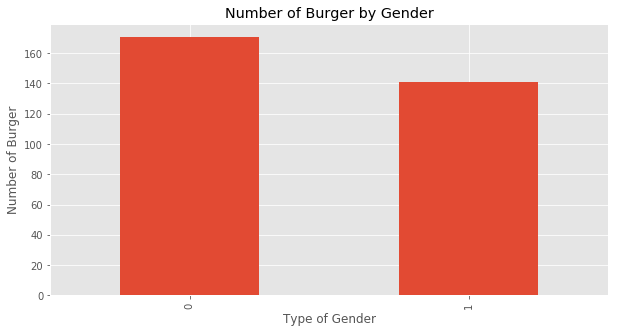

In [18]:
data['Gender'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title('Number of Burger by Gender')
plt.ylabel('Number of Burger')
plt.xlabel('Type of Gender')

Text(0, 0.5, 'count')

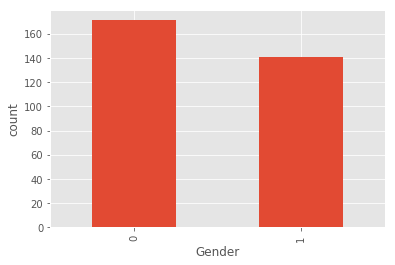

In [0]:
barplot = data['Gender'].value_counts().plot(kind='bar');
plt.xlabel('Gender')
plt.ylabel('count')

Text(0.5, 0, 'Type of Payment')

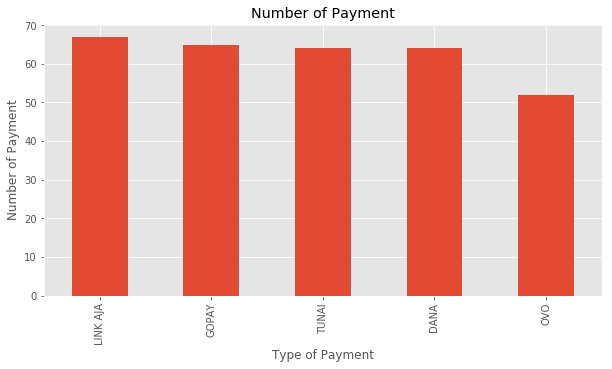

In [19]:
data['Payment'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title('Number of Payment')
plt.ylabel('Number of Payment')
plt.xlabel('Type of Payment')

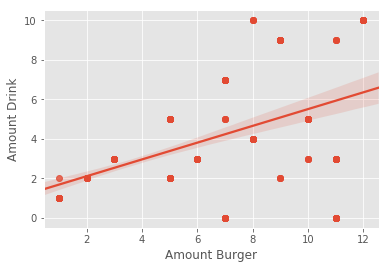

In [28]:
sns.regplot(data['Amount Burger'],data['Amount Drink'],fit_reg=True)

In [0]:
data['Jam'] = data['Timestamp'].replace(r':\d\d', "",regex=True)

In [32]:
data['Jam']=data['Jam'].astype('int')
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,campur,Jam
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,"[Beef burger, Mineral water]",10
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,"[Cheese burger, Coke]",10
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,"[Double cheese burger, Mineral water]",10
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,"[Chicken burger, Coffe]",10
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,"[Cheese burger, Coke]",10


In [34]:
time = []
a = []

for i in range(10,22):
    a.append(len(data[(data['Jam']==i)]))
    time.append(i)
new=pd.DataFrame()
new['time']=time
new['count']=a
new.index=new['time']
new=new.drop('time',1)
new

,count
time,
10,29
11,40
12,25
13,24
14,23
15,21
16,19
17,25
18,32


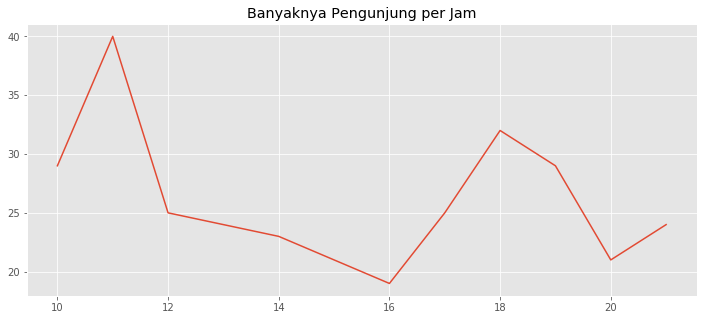

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
plt.title('Banyaknya Pengunjung per Jam')
plt.plot(new)

# **Modelling: Association using Apriori**

In [22]:
data['campur'] = data[['Type Burger','Type Drink']].values.tolist()
data['campur'].head()

0             [Beef burger, Mineral water]
1                    [Cheese burger, Coke]
2    [Double cheese burger, Mineral water]
3                  [Chicken burger, Coffe]
4                    [Cheese burger, Coke]
Name: campur, dtype: object

In [27]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffe),(Beef burger),0.282051,0.371795,0.089744,0.318182,0.855799,-0.015122,0.921368
1,(Beef burger),(Coffe),0.371795,0.282051,0.089744,0.241379,0.855799,-0.015122,0.946387
2,(Beef burger),(Coke),0.371795,0.221154,0.041667,0.112069,0.506747,-0.040557,0.877147
3,(Coke),(Beef burger),0.221154,0.371795,0.041667,0.188406,0.506747,-0.040557,0.774038
4,(Beef burger),(Mineral water),0.371795,0.349359,0.205128,0.551724,1.579247,0.075238,1.451430
5,(Mineral water),(Beef burger),0.349359,0.371795,0.205128,0.587156,1.579247,0.075238,1.521652
6,(Beef burger),(None),0.371795,0.147436,0.035256,0.094828,0.643178,-0.019560,0.941880
7,(None),(Beef burger),0.147436,0.371795,0.035256,0.239130,0.643178,-0.019560,0.825641
8,(Coke),(Cheese burger),0.221154,0.179487,0.179487,0.811594,4.521739,0.139793,4.355030
9,(Cheese burger),(Coke),0.179487,0.221154,0.179487,1.000000,4.521739,0.139793,inf


In [24]:
oht = OnehotTransactions()
oht_ary = oht.fit(data['campur']).transform(data['campur'])
data1 = pd.DataFrame(oht_ary, columns=oht.columns_)

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


In [25]:
data1.head()

,Beef burger,Cheese burger,Chicken burger,Coffe,Coke,Double cheese burger,Mineral water,None
0,True,False,False,False,False,False,True,False
1,False,True,False,False,True,False,False,False
2,False,False,False,False,False,True,True,False
3,False,False,True,True,False,False,False,False
4,False,True,False,False,True,False,False,False


In [26]:
frequent_itemsets = apriori(data1, min_support=0.005, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending =False)

,support,itemsets
0,0.371795,(Beef burger)
6,0.349359,(Mineral water)
3,0.282051,(Coffe)
2,0.227564,(Chicken burger)
4,0.221154,(Coke)
5,0.221154,(Double cheese burger)
10,0.205128,"(Beef burger, Mineral water)"
1,0.179487,(Cheese burger)
12,0.179487,"(Coke, Cheese burger)"
7,0.147436,(None)


# **Modelling: Classification using K-Means (Test)**

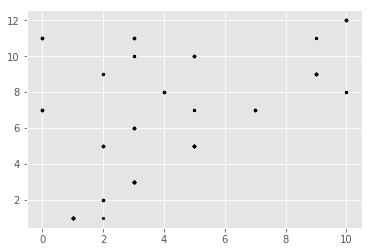

In [36]:
# Getting the values and plotting it
f1 = data['Amount Drink'].values
f2 = data['Amount Burger'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [0]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [54]:
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 2. 11.]
 [ 8.  6.]
 [ 2.  4.]]


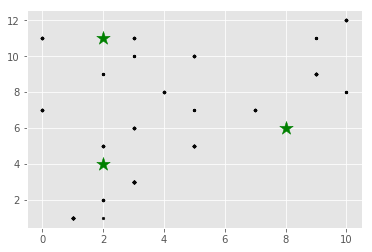

In [55]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [0]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

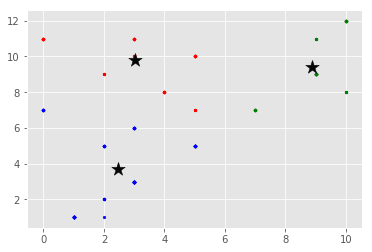

In [57]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')